In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data_fraud=data.loc[data["Class"] ==1]
data_Nonfraud=data.loc[data["Class"] ==0]
print("fraud dataset Shape: {} and non-fraud dataset Shape {}, ratio :{}".format(data_fraud.shape, data_Nonfraud.shape,(data_fraud.shape[0]/data.shape[0])*100))

fraud dataset Shape: (492, 31) and non-fraud dataset Shape (284315, 31), ratio :0.1727485630620034


0    284315
1       492
Name: Class, dtype: int64

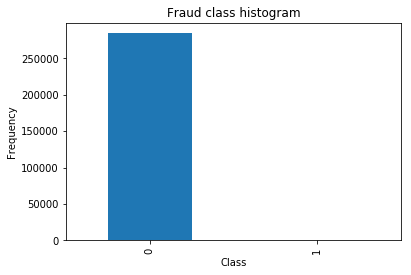

In [4]:
count_classes =pd.value_counts(data['Class'])
count_classes.plot(kind="bar") # OR count_class.plot.bar()
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
data["Class"].value_counts()

In [5]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [6]:
X = data.drop('Class', axis=1)
y = data['Class']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.20)

In [8]:
# from sklearn.model_selection import StratifiedKFold
# skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
# for train_index, test_index in skf.split(X, y):
#     print("Train:", train_index, "Test:", test_index)
#     Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
#     ytrain, ytest = y.iloc[train_index], y.iloc[test_index]

In [9]:
from imblearn.under_sampling import (RandomUnderSampler)
sampler = RandomUnderSampler(sampling_strategy=1)
X_train_balanced, y_train_balanced=sampler.fit_resample(X_train,y_train)

Using TensorFlow backend.


In [10]:
y_unRe_labels,y_unRe_counts_label = np.unique(y_train_balanced, return_counts=True)
y_unRe_labels,y_unRe_counts_label

(array([0, 1], dtype=int64), array([394, 394], dtype=int64))

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold,cross_val_predict
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics


In [12]:
# [lr.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test])
#  for train, test in k_fold.split(X_digits)]

In [13]:
X_train_balanced=X_train_balanced.values
X_test=X_test.values
y_test=y_test.values
y_train_balanced=y_train_balanced.values

In [14]:
y_train_balanced=y_train_balanced.ravel()
y_test=y_test.ravel()

In [15]:
# skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
lr=LogisticRegression()

In [16]:
# [lr.fit(X_train_balanced[train], y_train_balanced[train]).score(X_train_balanced[test], y_train_balanced[test])
#  for train, test in skf.split(X_train_balanced,y_train_balanced)]

In [17]:
# lr.score(X_test,y_test)

In [18]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [19]:
from sklearn.model_selection import GridSearchCV
c_param_range = [0.01,0.1,1,10,100]
dual=[True,False]

In [20]:
param_grid = dict(dual=dual, C=
                 c_param_range)

In [21]:
grid = GridSearchCV(estimator=lr, param_grid=param_grid, n_jobs=-1,scoring="roc_auc")

In [22]:
grid_result = grid.fit(X_train_balanced, y_train_balanced)

In [23]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.982465 using {'C': 0.01, 'dual': False}


In [24]:
#use ROC curve
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [25]:
lr_pred = cross_val_predict(lr.set_params(C=0.01), X_train_balanced, y_train_balanced, cv=5,
                             method="decision_function")

In [26]:
print('Logistic Regression Classifier: ', roc_auc_score(y_train_balanced, lr_pred))

Logistic Regression Classifier:  0.981305882656085


In [27]:
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_train_balanced, lr_pred)

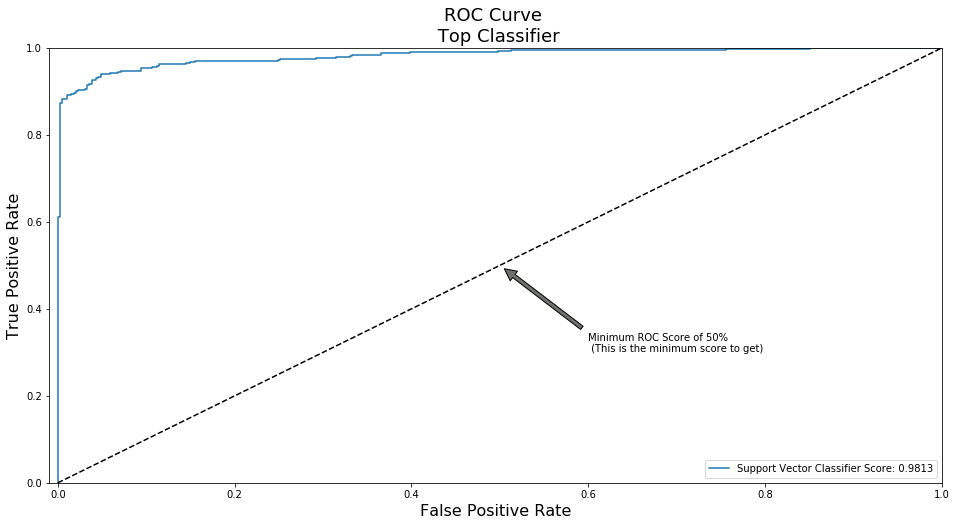

In [31]:
def graph_roc_curve_multiple( lr_fpr, lr_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top Classifier', fontsize=18)
    plt.plot(lr_fpr, lr_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train_balanced, lr_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(lr_fpr, lr_tpr)
plt.show()

In [35]:
final_Model=lr.set_params(C=0.01).fit(X_train_balanced,y_train_balanced)

In [36]:
final_Model.score(X_test,y_test)

0.988132439169973